# Iris Data Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [4]:
from sklearn.svm import SVC

In [5]:
model = SVC()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [7]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
from sklearn import metrics

predicted = model.predict(X_test)

In [9]:
expected = Y_test

In [10]:
print(metrics.accuracy_score(predicted,expected))

0.947368421053


In [11]:
from sklearn import svm

X= iris.data[:,:2]

Y = iris.target

In [12]:
C = 1.0 

In [13]:
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)

### Gaussian Radial Basis Function

In [14]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

In [15]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)

In [16]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [18]:
h = 0.02

x_min = X[:,0].min()-1
x_max = X[:,0].max()+1

y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

In [19]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel'] 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


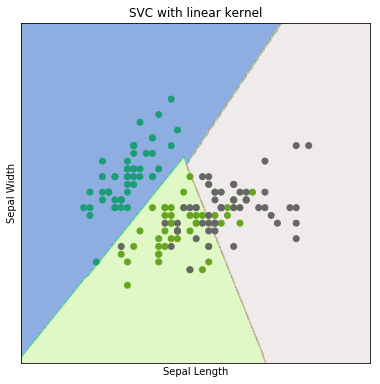

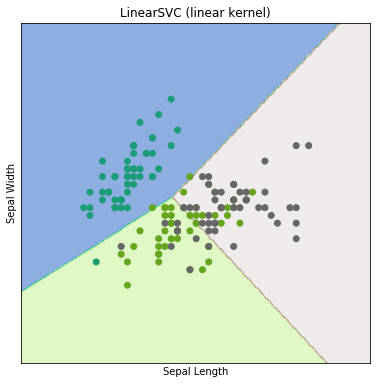

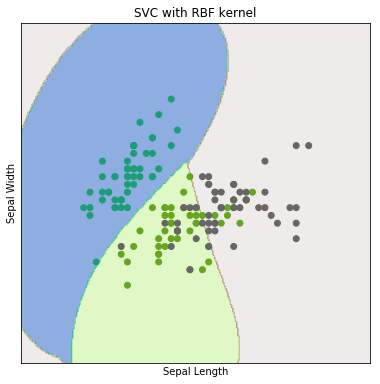

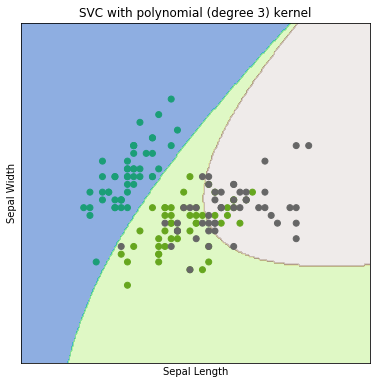

In [23]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidth=0)
    
    plt.scatter(X[:,0],X[:,1], c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    
    plt.title(titles[i])